<a href="https://colab.research.google.com/github/iankitapanda/demo_learn/blob/main/protechta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio  # Or the specific version you need

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
import torch
print(torch.cuda.is_available())


True


In [2]:
import torch

# Create a tensor on the GPU
if torch.cuda.is_available():
    device = torch.device('cuda')  # Use GPU
else:
    device = torch.device('cpu')  # Use CPU

x = torch.tensor([1, 2, 3]).to(device) # or x = torch.tensor([1, 2, 3], device=device)

# ... rest of your code

from google.colab import drive
drive.mount('/content/logodetection.zip')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving fakelogo.zip to fakelogo.zip


In [4]:
import zipfile
import os

zip_path = "/content/fakelogo.zip"  # Change this to the actual file name
extract_path = "/content/unzipped_folder"  # Change as needed

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content/unzipped_folder


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import os
import pandas as pd  # If you have a CSV file with labels

# 1. Set Device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. Data Loading and Preprocessing
# --- Choose ONE of the following data loading methods ---

# --- Option 1: ImageFolder (If your data is in folders) ---
train_dir = "/content/unzipped_folder"  # Replace with the actual path
val_dir = "/content/unzipped_folder"      # Replace with the actual path
test_dir = "/content/unzipped_folder"    # Replace with the actual path

transform_train = transforms.Compose([ # ... Transformations (data augmentation)
    transforms.Resize((224, 224)),       # Resize images
    transforms.RandomHorizontalFlip(),    # Randomly flip images horizontally
    transforms.ToTensor(),                # Convert to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # ImageNet stats for normalization
])

transform_val = transforms.Compose([ # ... Transformations (NO augmentation for validation)
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([ # ... Transformations (NO augmentation for testing)
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset = torchvision.datasets.ImageFolder(root=val_dir, transform=transform_val)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=transform_test)


# --- Option 2: ImageDataset with CSV (If you have a CSV with labels) ---
# csv_file_path = "/content/data/your_labels.csv"  # Replace with CSV path
# image_dir = "/content/data/ANKITA"  # Replace with image directory

# class ImageDataset(torch.utils.data.Dataset): #... (same as before)

# train_dataset = ImageDataset(csv_file=..., image_dir=..., transform=transform_train) # Adjust paths
# val_dataset = ImageDataset(csv_file=..., image_dir=..., transform=transform_val) # Adjust paths
# test_dataset = ImageDataset(csv_file=..., image_dir=..., transform=transform_test) # Adjust paths


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)  # Adjust batch size
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# 3. Model Definition (ResNet50)
model = torchvision.models.resnet50(pretrained=True)  # Use a pre-trained model
num_classes = len(train_dataset.classes) # Get the number of classes from the dataset
model.fc = nn.Linear(model.fc.in_features, num_classes) # Modify the classifier
model.to(device)  # Move the model to the GPU

# 4. Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can use other optimizers

# 5. Training Loop
num_epochs = 10  # Adjust as needed
best_accuracy = 0.0  # For saving the best model

for epoch in range(num_epochs):
    # Training phase
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation phase (same as before)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad(): # Important for validation and testing
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.2f}%")

    # Save the best model (using validation accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), 'best_model.pth')

# 6. Testing (after training)
model.load_state_dict(torch.load('best_model.pth'))  # Load the best saved model
model.eval()
correct = 0
total = 0
with torch.no_grad(): # Important for testing
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# 7. Prediction Example (Single Image)
# Example usage (replace with your image path)
# ... (rest of your code, including the predict_image function)
# Example usage (replace with your image path)
import os

def extract_class_and_subclass(image_path):
    """Extracts the class and subclass names from an image path."""
    parts = image_path.split('/')
    subclass_name = parts[-2]  # Get the second to last part of the path
    class_name = parts[-3] # Assuming class is one level up
    return class_name, subclass_name

def extract_subclass_from_path(image_path):
    """Extracts the subclass name from an image path."""
    subclass_name = image_path.split('/')[-2]  # Get the second to last part of the path
    return subclass_name

# Example usage:
image_path = "/content/unzipped_folder/output/Adidas/000004.jpg"
class_name, subclass_name = extract_class_and_subclass(image_path) # Call the correct function
print(f"Class: {class_name}, Subclass: {subclass_name}")

image_path = "/content/unzipped_folder/output/Nike/000001.jpg"
class_name, subclass_name = extract_class_and_subclass(image_path) # Call the correct function
print(f"Class: {class_name}, Subclass: {subclass_name}")

image_path = "/content/unzipped_folder/output/Puma/000010.jpg"
class_name, subclass_name = extract_class_and_subclass(image_path) # Call the correct function
print(f"Class: {class_name}, Subclass: {subclass_name}")

Using device: cuda:0


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 112MB/s]


Epoch [1/10], Validation Accuracy: 82.91%
Epoch [2/10], Validation Accuracy: 95.52%
Epoch [3/10], Validation Accuracy: 86.06%
Epoch [4/10], Validation Accuracy: 96.97%
Epoch [5/10], Validation Accuracy: 96.97%
Epoch [6/10], Validation Accuracy: 96.00%
Epoch [7/10], Validation Accuracy: 98.67%
Epoch [8/10], Validation Accuracy: 88.00%
Epoch [9/10], Validation Accuracy: 92.36%
Epoch [10/10], Validation Accuracy: 93.82%
Test Accuracy: 98.67%
Class: output, Subclass: Adidas
Class: output, Subclass: Nike
Class: output, Subclass: Puma


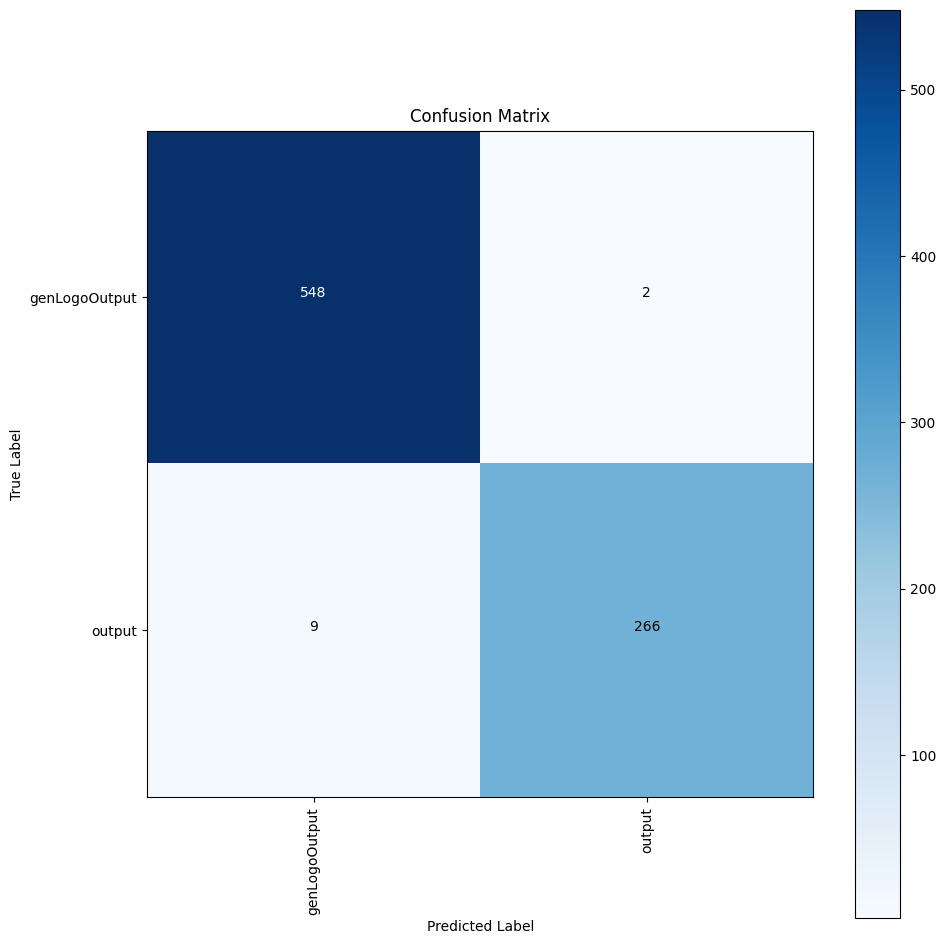

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools # Import the itertools module

# ... (After the testing loop)

# Get all predictions and labels from the test loader
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy()) # move to cpu and convert to numpy
        all_labels.extend(labels.cpu().numpy())

# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix (optional but highly recommended)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(test_dataset.classes))
plt.xticks(tick_marks, test_dataset.classes, rotation=90) # Rotate labels for better readability
plt.yticks(tick_marks, test_dataset.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add counts to the confusion matrix cells
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # itertools is now defined
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# ... (rest of your code)

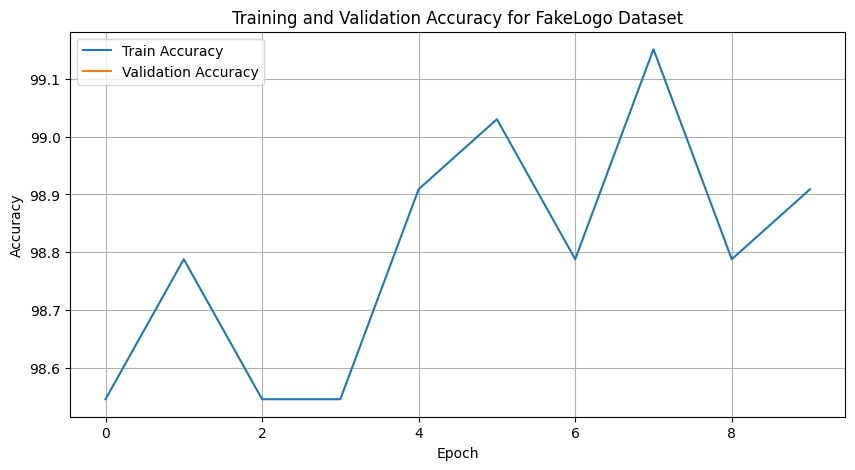

In [7]:
import matplotlib.pyplot as plt

# ... (Your training loop code)
train_accuracies = []  # Initialize empty lists to store accuracy values
val_accuracies = []

for epoch in range(num_epochs):
    # ... (Your training code)

    # Training Accuracy Calculation
    model.eval()  # Set the model to evaluation mode
    correct_train = 0
    total_train = 0
    with torch.no_grad():  # Disable gradient calculation for efficiency
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)

    # ... (Your validation code)

    # Validation Accuracy Calculation (similar to training)
    # ... (Calculate val_accuracy and append to val_accuracies)

# After the training loop:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for FakeLogo Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
import cv2
import os


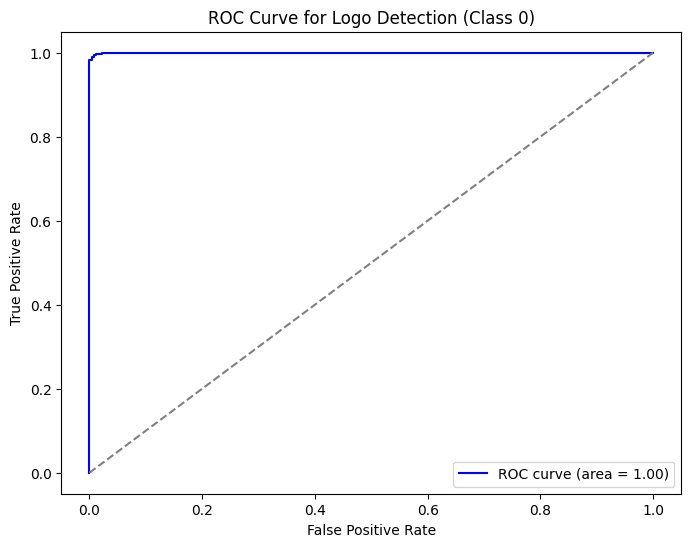

In [ ]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained model and a test loader
# ...

# Get all predictions (probabilities) and labels from the test loader
all_probs = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)  # Get probabilities for each class
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to NumPy arrays
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

# Calculate ROC curve and AUC for a specific class (e.g., class index 0)
fpr, tpr, _ = roc_curve(all_labels == 0, all_probs[:, 0])  # Assuming class 0 is of interest
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logo Detection (Class 0)')  # Update title
plt.legend(loc='lower right')
plt.show()

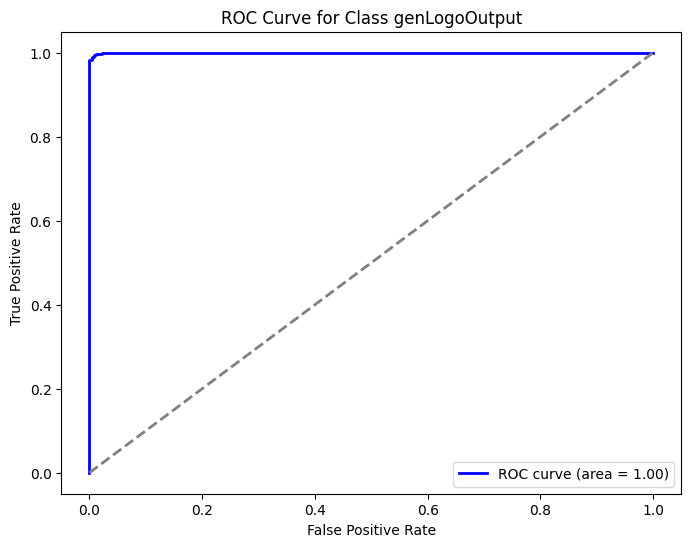

In [ ]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained model and a test loader
# ...

# Get all predictions (probabilities) and labels from the test loader
all_probs = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)  # Get probabilities for each class
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to NumPy arrays
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

# Assuming you want to plot ROC for class 0 (Adidas)
class_index = 0  # Replace with the desired class index (0 for Adidas, etc.)
y_true = (all_labels == class_index).astype(int)  # True labels for the class
y_scores = all_probs[:, class_index]  # Model's prediction scores for the class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Class {test_dataset.classes[class_index]}')  # Title with class name
plt.legend(loc="lower right")
plt.show()

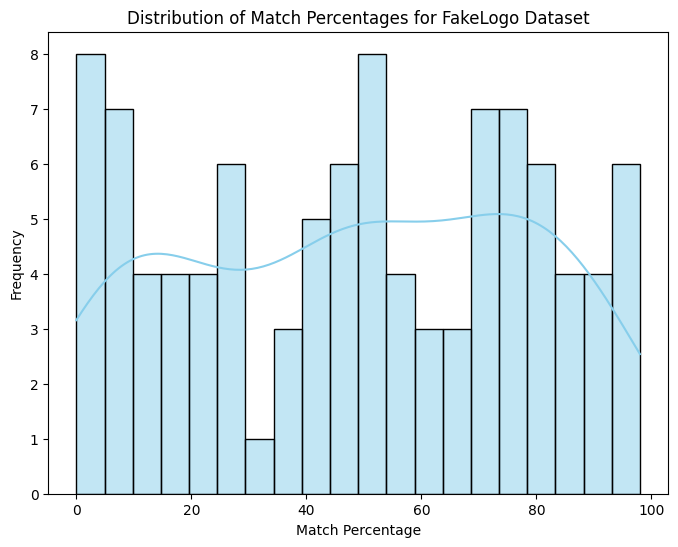

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random  # Import the random module

# ... (rest of your code)

# Get a list of all logo image paths
logo_paths = []  # Replace with a list of paths to your logo images
for root, dirs, files in os.walk('/content/unzipped_folder'):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust image extensions if needed
            logo_paths.append(os.path.join(root, file))

# Calculate similarity scores for a sample of logos (e.g., 100 pairs)
num_samples = 100
match_scores = []
for _ in range(num_samples):
    logo1_path = random.choice(logo_paths) # Now random is defined
    logo2_path = random.choice(logo_paths)
    similarity_score = calculate_similarity(logo1_path, logo2_path)
    match_scores.append(similarity_score)

# Plot the distribution of match percentages
plt.figure(figsize=(8, 6))
sns.histplot(match_scores, bins=20, kde=True, color="skyblue")  # Changed color to skyblue
plt.xlabel("Match Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Match Percentages for FakeLogo Dataset")
plt.show()

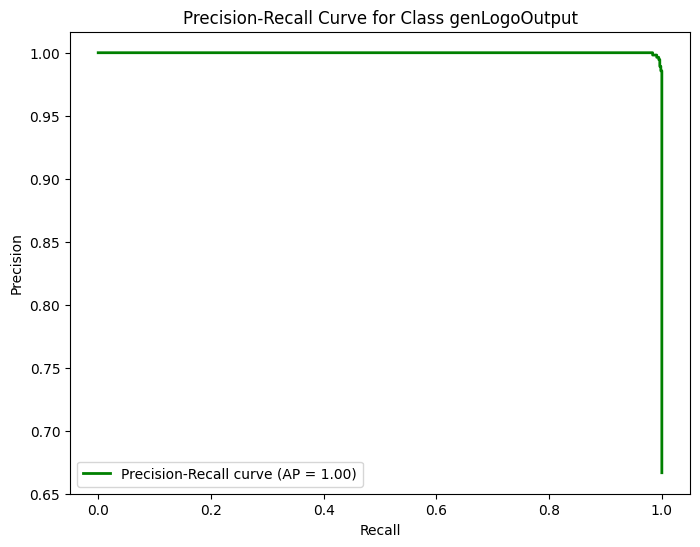

In [ ]:
import torch
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ... (Your existing code for data loading, model, etc.)

# Get all predictions (probabilities) and labels from the test loader
all_probs = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

# Assuming you want to plot for class 0 (Adidas)
class_index = 0  # Replace with the desired class index
y_true = (all_labels == class_index).astype(int)
y_scores = all_probs[:, class_index]

# Calculate precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_true, y_scores)
average_precision = average_precision_score(y_true, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2,
         label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for Class {test_dataset.classes[class_index]}')
plt.legend(loc='lower left')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


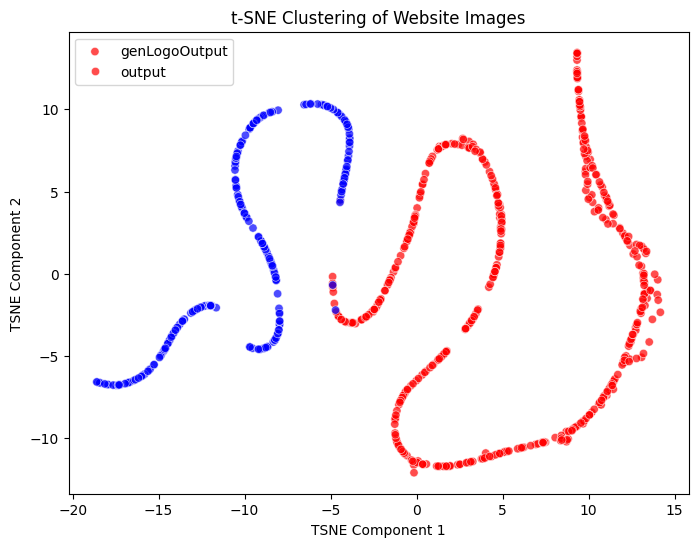

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# ... (Your existing code for data loading, model, etc.)

# Extract features from the ResNet model
features = []
labels = []
with torch.no_grad():
    for images, batch_labels in test_loader:
        images = images.to(device)
        outputs = model(images)  # Get the model's output
        features.extend(outputs.cpu().numpy())  # Assuming 'outputs' are the features
        labels.extend(batch_labels.cpu().numpy())

features = np.array(features)
labels = np.array(labels)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300) # Adjusted parameters
X_2D = tsne.fit_transform(features)

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=labels,
                palette=['red', 'blue'], alpha=0.7)  # Assuming 0 = phishing, 1 = real
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("t-SNE Clustering of Website Images")
plt.legend(test_dataset.classes)  # Use actual class names from the dataset
plt.show()

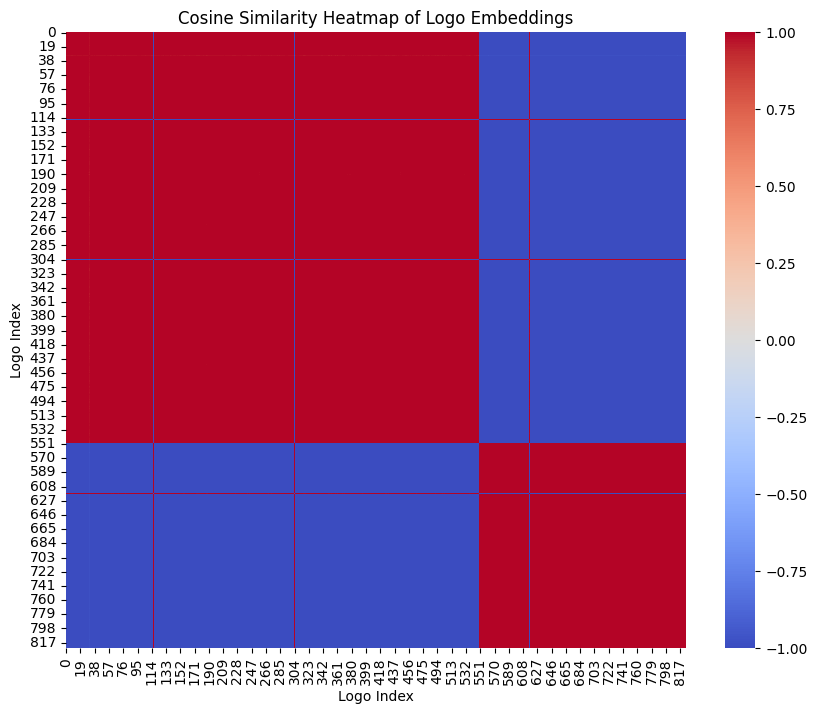

In [ ]:
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for data loading, model, etc.)

# Function to extract features from a batch of images
def extract_features(images, model, device):
    with torch.no_grad():
        images = images.to(device)
        features = model(images)  # Get model output (features)
        return features.cpu().numpy()

# Extract features for all images in the test dataset
all_features = []
for images, _ in test_loader:  # We only need the images
    batch_features = extract_features(images, model, device)
    all_features.extend(batch_features)

all_features = np.array(all_features)

# Calculate cosine similarity
cos_sim = cosine_similarity(all_features)

# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(cos_sim, cmap="coolwarm", annot=False)
plt.title("Cosine Similarity Heatmap of Logo Embeddings")
plt.xlabel("Logo Index")
plt.ylabel("Logo Index")
plt.show()